In [1]:
import pandas as pd
import numpy as np

""" import data from csv file """
df = pd.read_csv('./data/SuperMarket Analysis.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [32]:
df.to_numpy()

array([['750-67-8428', 'Alex', 'Yangon', ..., 4.761904762, 26.1415, 9.1],
       ['226-31-3081', 'Giza', 'Naypyitaw', ..., 4.761904762, 3.82, 9.6],
       ['631-41-3108', 'Alex', 'Yangon', ..., 4.761904762, 16.2155, 7.4],
       ...,
       ['727-02-1313', 'Alex', 'Yangon', ..., 4.761904762, 1.592, 7.7],
       ['347-56-2442', 'Alex', 'Yangon', ..., 4.761904762, 3.291, 4.1],
       ['849-09-3807', 'Alex', 'Yangon', ..., 4.761904762, 30.919, 6.6]],
      dtype=object)

In [33]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [34]:
df[0:3]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4


In [35]:
df.groupby('City')['Unit price'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Mandalay,332.0,55.659277,26.224559,10.59,33.3000,54.850,77.0025,99.96
Naypyitaw,328.0,56.609024,27.179799,10.16,33.7675,56.810,81.5525,99.96
Yangon,340.0,54.780853,26.132127,10.08,32.2500,53.235,75.0950,99.83


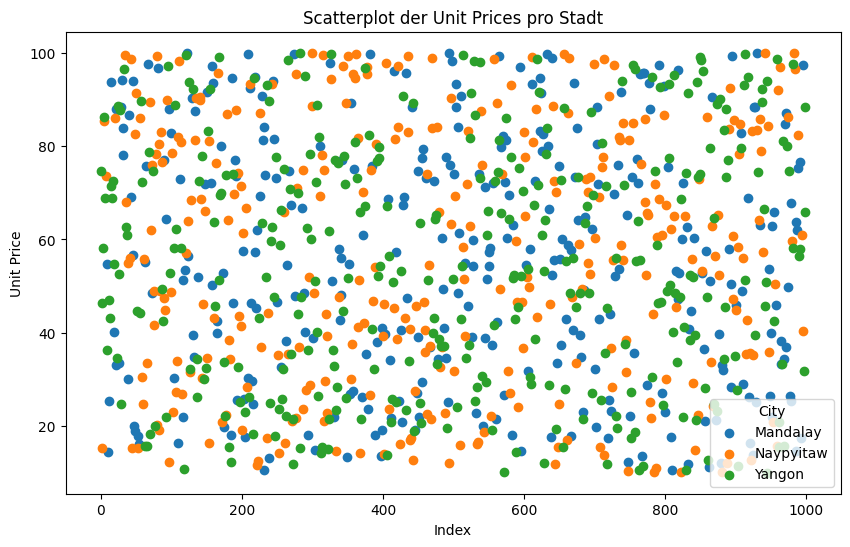

In [36]:
import matplotlib.pyplot as plt

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Jede Stadt in einer anderen Farbe plotten
for city, group_data in df.groupby('City'):
    plt.scatter(group_data.index, group_data['Unit price'], label=city)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.title('Scatterplot der Unit Prices pro Stadt')
plt.legend(title='City')
plt.show()


<Figure size 1000x600 with 0 Axes>

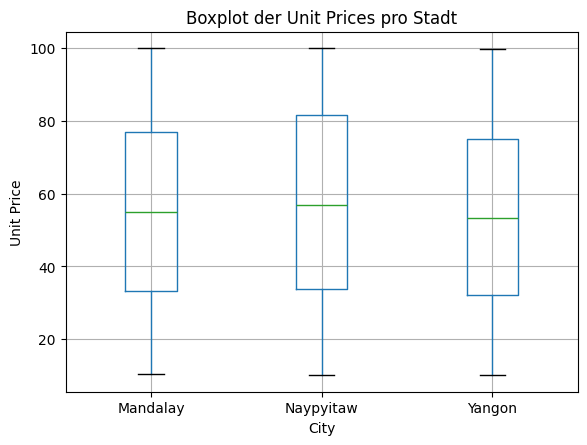

In [37]:
import matplotlib.pyplot as plt

# Boxplot erstellen, gruppiert nach Stadt
plt.figure(figsize=(10, 6))
df.boxplot(column='Unit price', by='City')

# Titel und Achsenbeschriftungen anpassen
plt.title('Boxplot der Unit Prices pro Stadt')
plt.suptitle('')  # Entfernt den Standard Suptitle von pandas
plt.xlabel('City')
plt.ylabel('Unit Price')
plt.show()



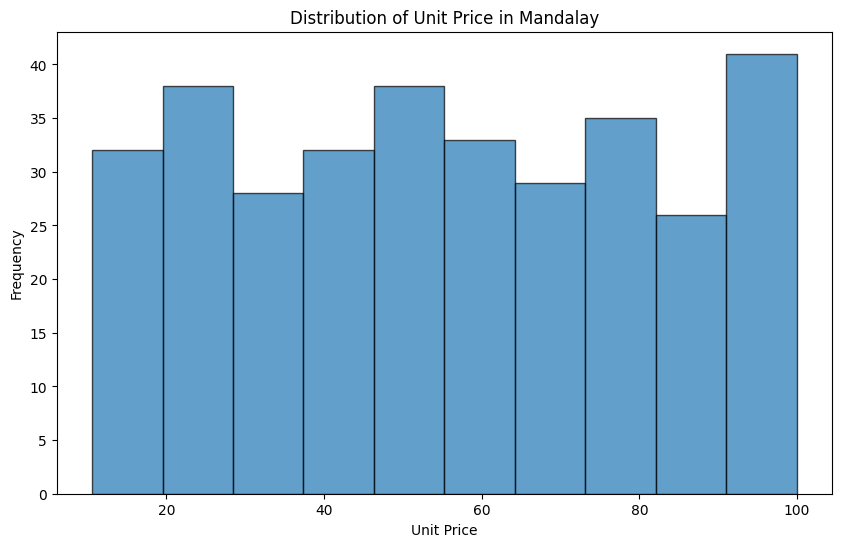

In [38]:
import matplotlib.pyplot as plt

# Filter data for a specific city, for example "Berlin"
city_data = df[df['City'] == 'Mandalay']

# Create a histogram of the "Unit Price" distribution
plt.figure(figsize=(10, 6))
plt.hist(city_data['Unit price'], bins=10, alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price in Mandalay')
plt.show()

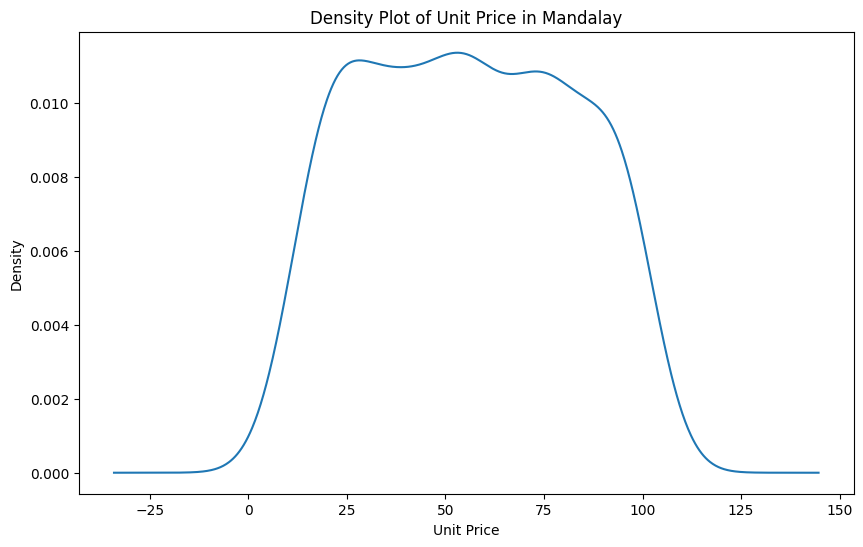

In [39]:
import matplotlib.pyplot as plt

# Filter data for a specific city, for example "Berlin"
city_data = df[df['City'] == 'Mandalay']


# Create a density plot of the "Unit Price" distribution
plt.figure(figsize=(10, 6))
city_data['Unit price'].plot(kind='kde')

# Add labels and title
plt.xlabel('Unit Price')
plt.title('Density Plot of Unit Price in Mandalay')
plt.show()
